## Kepler orbital motion

This code is a simulation of how the planets orbit around the sun, following the 3 kepler laws 

1 The shape of an orbit is an ellipse, and the Sun is located at one of its foci

2 The distance line that conects the Sun and one planet sweeps equal areas in equal times

3 The ratio of the square of the orbital period and, the cube of the semimajor axis is always constant.

# Equations used

## Kepler first law (polar form)

## r($\theta$)= $\frac{a(1-\epsilon^2)}{1+\epsilon\cos(\theta)}$ where $\epsilon$ = $\frac{c}{a}$

## Kepler first law (cartesian form)

## $\frac{(x+c)^2}{a^2}+\frac{y^2}{b^2}$=1  where a is the semimajor axis, b is the semiminor axis, $c^2=a^2-b^2$ 

## Kepler second law

## $\frac{dA}{dt}= \frac{\ell^2}{2\mu} = const$

## Kepler third law

## $\frac{\tau^2}{a^3} = \frac{4\pi^2}{G(m_1+m_2)}=const$

## Eccentric anomaly

## E= $2\arctan(\sqrt{\frac{1-\epsilon^2}{1+\epsilon^2}}\tan(\frac{\theta}{2}))$

## Parameters for the kepler first law in cartesian form

## $x=a\cos(\theta)-c$,  $y=b\sin(\theta)$

The methodology followed was, first of all, setting the proper equations, since we are talking about planetary motion, kepler laws should be the guide to follow, first law is that an orbit must have an elliptical form, so, using kepler first law in cartesian coordinates to draw the orbit expected to follow will be the first thing to do (it is possible to set it up in polar coordinate too, but is harder to define the limits of the screen with polar coordinates.)

Next, after i choose to use that, i parametrize the equation in terms of $\theta$, so, x and y values will change at the same time with both sharing a $\theta$ parameter and check if with that parameter can move around the ellipse using on of the foci as the rotation axis.

After that we confirm that the planet (or any celestial object) can rotate around any point in the circunference of the ellipse, we have to set kepler second law to make sure that the line that marks the distance between the planet and the sun sweeps equal areas in equal times, for that, we use something that is called the "Eccentric anomaly" and that is an equation in function of the theta angle that moves the planet into specific points that the arc length it covers is such that the swept area follows kepler second law, then, we solve the Eccentric anomaly for $\theta$ and plug in the $\theta$ value in the parameters, now we have x and y in terms of the Eccentric anomaly and $\theta$ at the same time.

Usually next we include the third law, however, since this is a simulation of just one planet orbiting around the Sun, we are not going to include it for now. 

Now that we make sure that planets will move around the ellipse following kepler laws, we add a frame dependency for $\theta$ such that it starts from 0 to 2$\pi$ in the required frame number, since this animation has a total of 100 frames, $\theta$ will change in a way such that $\theta\frac{frame}{total frames-1}$ (we substract 1 because we are including the zero frame and excluding the 100 frame.), so at the end of the animation, we see a full revolution of the planet around the sun in terms of theta and the frames.

With all of this, we can check the orbit of each planet just by typing the appropiete values of a and b, just with that, we can see how the planet moves around the sun, for example, for this code i used the date for Halley comet due that it has a high excentricity, the elliptical form will be visible even at real scale, but changing the a and b values is enough to get an orbit. 

## Libraries used for the simulation

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline
%matplotlib notebook
#from IPython import display
import cmath
import math

<IPython.core.display.Javascript object>


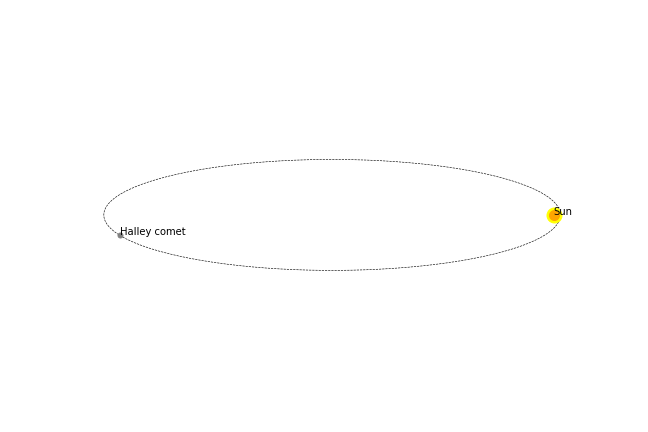

In [57]:
fig, ax = plt.subplots(figsize=(9, 6))

ax.set()

theta=np.linspace(0,2*np.pi,200)   #Angle position

a=2.65*10**12   #Semimajor axis of the planet orbit
b=6.44*10**11   #Semiminor axis of the planet orbit

c=(a**2-b**2)**(1/2)   #Focal distance of the planet orbit
ex= c/a                #Eccentricity (for ellipses 0<ex<1)

def animate(frame):
    ax.cla()
    
    EA = 2*np.arctan(((1+ex)/(1-ex))**(1/2)*(np.tan((frame/99)*np.pi)))   #Eccentric anomaly 
    
    x_orbit=a*np.cos(theta)-c   #This values draw the orbit
    y_orbit=b*np.sin(theta)
    
    x_planet=a*np.cos(EA)-c   #This values are the planet position
    y_planet=b*np.sin(EA)
    
    ax.axis("off")
    
    ax.plot(x_orbit, y_orbit, linestyle="--", linewidth=0.6, color="black")
    ax.plot(0, 0, "o", markersize=15, color="yellow")
    ax.plot(0, 0, "o", markersize=10, color="orange")
    ax.plot(x_planet, y_planet, "o", markersize=5,color="gray")
    ax.text(x_planet, y_planet, "Halley comet")    #Tag of the planet
    ax.text(0, 0, "Sun")                           #Tag of the Sun
    ax.set()

anim = FuncAnimation(fig, animate, frames=100, interval=100)
ax.axis("scaled")
plt.show()

This code piece is to save the plot in a gif format in the PC.

In [46]:
#anim.save("Halley orbit areas.gif", matplotlib.animation.PillowWriter(fps=10))